## 1. Load Required Libraries

In [1]:
import src.util as utils
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.tree import DecisionTreeClassifier
from sklearn import tree
from sklearn.metrics import classification_report, ConfusionMatrixDisplay

## 2. Load Configuration File

In [2]:
config = utils.load_config()

## 3. Load Train and Valid Set

In [3]:
def load_train_feng(params: dict) -> pd.DataFrame:
    # Load train set
    x_train = utils.pickle_load(params["train_feng_set_path"][0])
    y_train = utils.pickle_load(params["train_feng_set_path"][1])

    return x_train, y_train

def load_valid(params: dict) -> pd.DataFrame:
    # Load valid set
    x_valid = utils.pickle_load(params["valid_feng_set_path"][0])
    y_valid = utils.pickle_load(params["valid_feng_set_path"][1])

    return x_valid, y_valid

def load_test(params: dict) -> pd.DataFrame:
    # Load tets set
    x_test = utils.pickle_load(params["test_feng_set_path"][0])
    y_test = utils.pickle_load(params["test_feng_set_path"][1])

    return x_test, y_test

In [4]:
x_train, y_train = load_train_feng(config)
x_valid, y_valid = load_valid(config)
x_test, y_test = load_test(config)

## 4. Training Model

In [5]:
dtc = DecisionTreeClassifier()

In [6]:
dtc.fit(x_train, y_train)

DecisionTreeClassifier()

In [7]:
x_train

,Humidity[%],Pressure[hPa],PM1.0,TVOC[ppb],Raw H2,Raw Ethanol
53451,43.68,937.321,1.85,125,12793,20595
6038,53.28,939.662,1.46,142,13186,20131
8829,52.19,939.286,0.39,342,13073,19915
45860,52.85,938.691,2.02,1352,12946,19393
33650,53.19,939.318,0.45,339,13091,19923
...,...,...,...,...,...,...
53706,42.23,937.317,1.80,163,12771,20558
26094,50.47,939.751,0.17,13,13050,19951
54937,44.47,937.394,1.92,0,13420,21217
53444,48.38,937.334,1.95,142,12792,20580


[Text(0.6786644345238095, 0.9583333333333334, 'TVOC[ppb] <= 217.5\ngini = 0.497\nsamples = 18137\nvalue = [9799, 8338]\nclass = y[0]'),
 Text(0.4603794642857143, 0.875, 'Raw H2 <= 13143.5\ngini = 0.232\nsamples = 11124\nvalue = [9635, 1489]\nclass = y[0]'),
 Text(0.09523809523809523, 0.7916666666666666, 'TVOC[ppb] <= 209.5\ngini = 0.005\nsamples = 7524\nvalue = [7505, 19]\nclass = y[0]'),
 Text(0.047619047619047616, 0.7083333333333334, 'Raw H2 <= 13140.5\ngini = 0.001\nsamples = 7428\nvalue = [7426, 2]\nclass = y[0]'),
 Text(0.023809523809523808, 0.625, 'gini = 0.0\nsamples = 7342\nvalue = [7342, 0]\nclass = y[0]'),
 Text(0.07142857142857142, 0.625, 'TVOC[ppb] <= 197.5\ngini = 0.045\nsamples = 86\nvalue = [84, 2]\nclass = y[0]'),
 Text(0.047619047619047616, 0.5416666666666666, 'gini = 0.0\nsamples = 83\nvalue = [83, 0]\nclass = y[0]'),
 Text(0.09523809523809523, 0.5416666666666666, 'PM1.0 <= 0.69\ngini = 0.444\nsamples = 3\nvalue = [1, 2]\nclass = y[1]'),
 Text(0.07142857142857142, 0.4

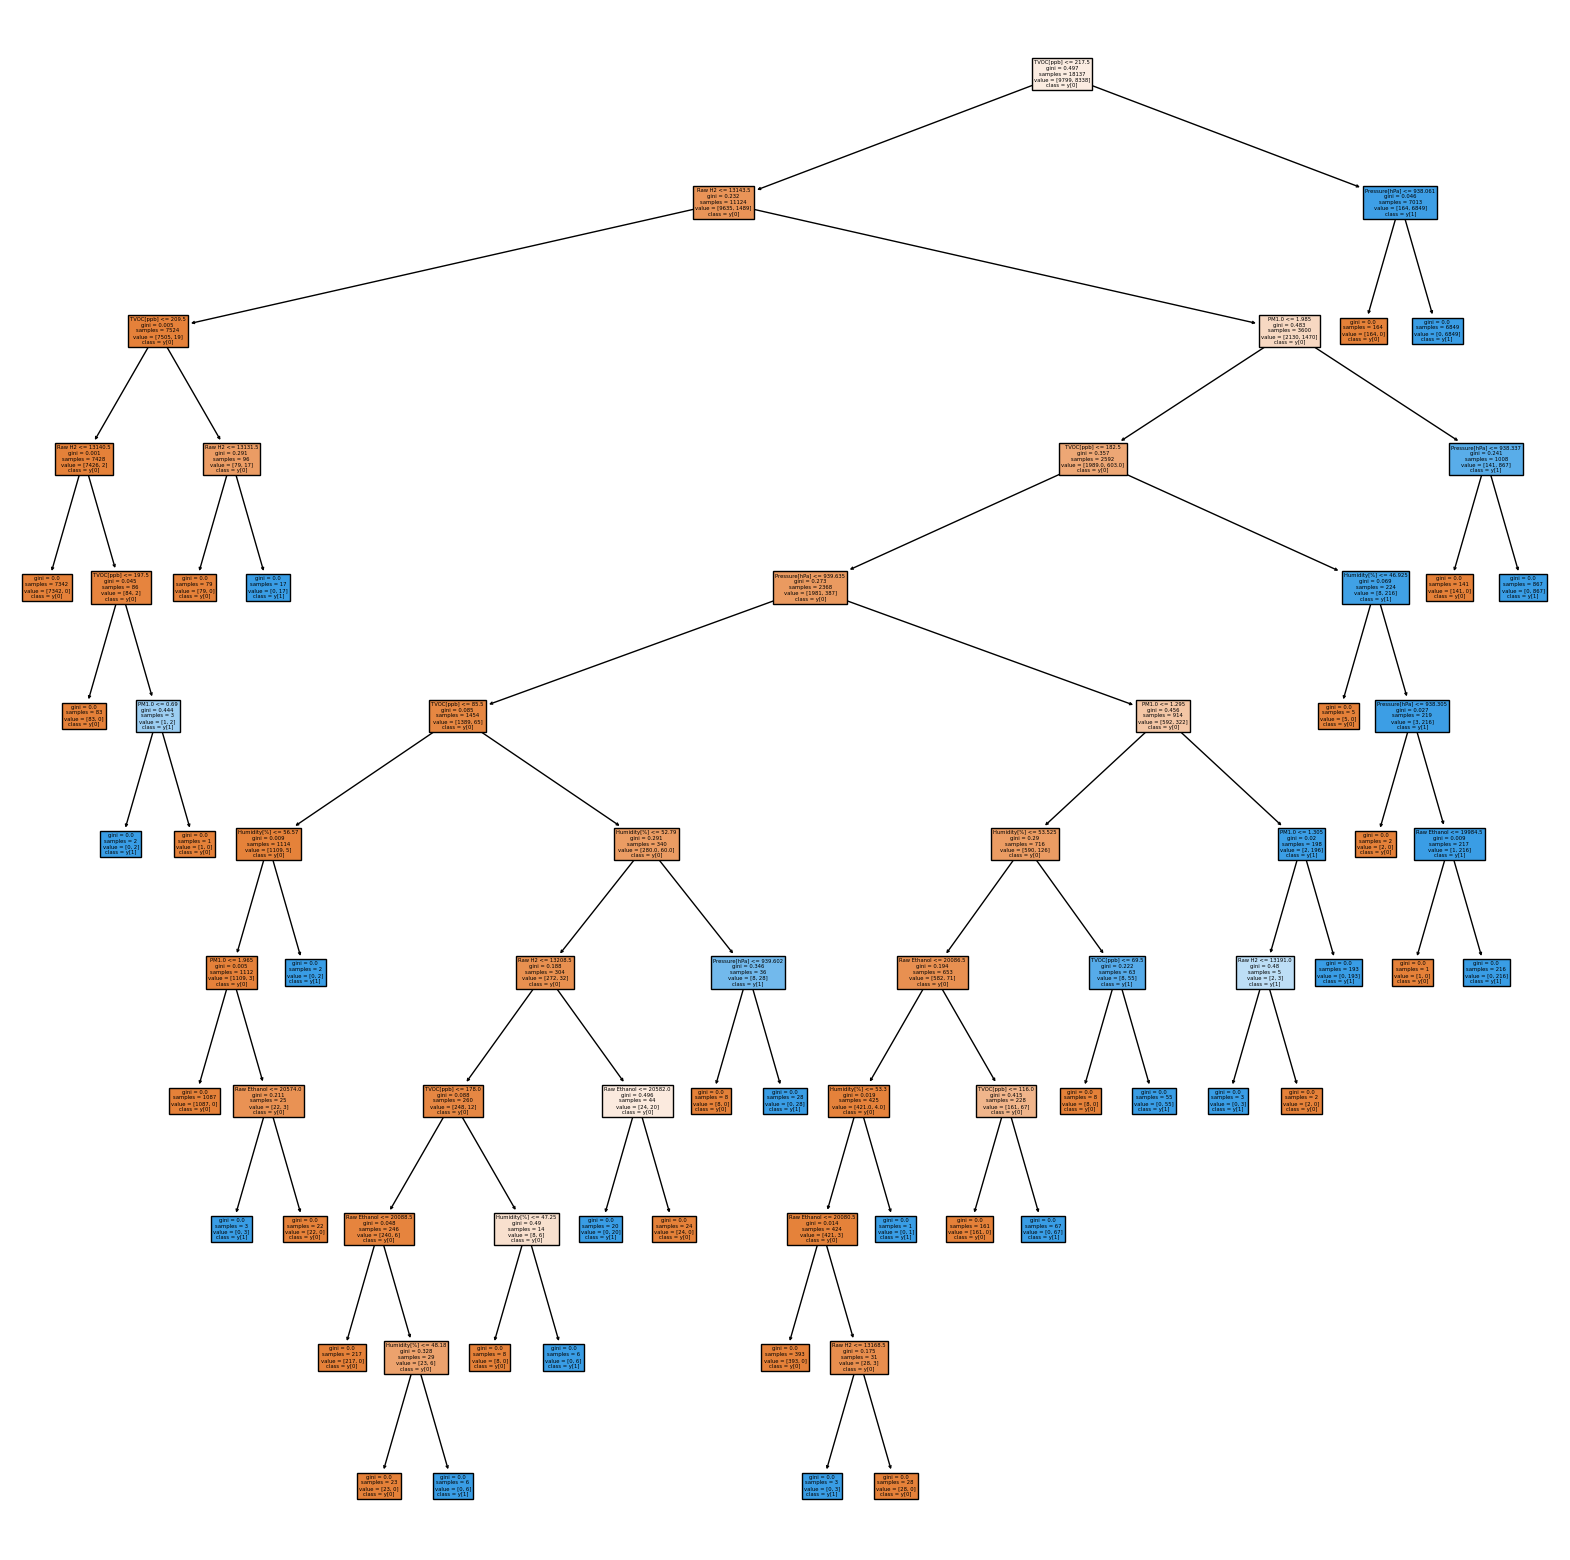

In [8]:
fig, ax = plt.subplots(figsize=(20,20)) 
tree.plot_tree(dtc, filled = True, ax = ax, feature_names = dtc.feature_names_in_, class_names = True)

## 5. Evaluation and Metrics

In [9]:
y_pred = dtc.predict(x_valid)

In [10]:
print(classification_report(y_valid, y_pred))

              precision    recall  f1-score   support

           0       0.94      1.00      0.97      2681
           1       1.00      0.97      0.99      6713

    accuracy                           0.98      9394
   macro avg       0.97      0.99      0.98      9394
weighted avg       0.98      0.98      0.98      9394



In [11]:
y_pred = dtc.predict(x_test)

In [12]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.94      1.00      0.97      2681
           1       1.00      0.98      0.99      6714

    accuracy                           0.98      9395
   macro avg       0.97      0.99      0.98      9395
weighted avg       0.98      0.98      0.98      9395



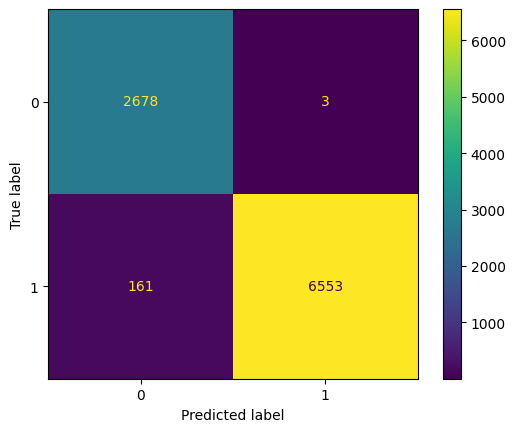

In [13]:
ConfusionMatrixDisplay.from_predictions(y_test, y_pred)

## 6. Dump Model Object

In [14]:
utils.pickle_dump(dtc, config["production_model_path"])

## 7. Prediction Check

In [21]:
model = utils.pickle_load("models/production_model.pkl")

In [22]:
y_pred = model.predict(x_valid)

In [23]:
y_pred

array([1, 1, 1, ..., 1, 1, 1])

In [24]:
valid_set = pd.concat([x_valid, y_valid], axis = 1)

In [25]:
valid_set["pred"] = y_pred

In [26]:
valid_set

,Humidity[%],Pressure[hPa],PM1.0,TVOC[ppb],Raw H2,Raw Ethanol,Fire Alarm,pred
29909,54.71,939.668,2.30,32,13241,20182,1,1
45793,51.67,938.690,2.25,1299,12954,19402,1,1
19709,47.48,938.694,1.69,1143,12926,19439,1,1
18326,47.45,938.715,1.64,1174,12909,19433,1,1
31237,53.64,939.679,0.86,168,13185,20110,1,1
...,...,...,...,...,...,...,...,...
271,55.74,939.796,0.16,9,12639,19705,0,0
28924,46.72,939.644,2.28,168,13207,20044,1,1
10608,48.61,939.081,2.18,1011,12781,19484,1,1
39261,52.68,938.895,1.80,1128,12851,19445,1,1


In [28]:
valid_set[valid_set["Fire Alarm"] != valid_set["pred"]].head(60)

,Humidity[%],Pressure[hPa],PM1.0,TVOC[ppb],Raw H2,Raw Ethanol,Fire Alarm,pred
50543,13.60,930.904,0.89,0,12936,20211,1,0
50201,31.35,931.107,2067.03,493,12824,19504,1,0
50166,35.50,931.112,280.89,90,13170,19891,1,0
50272,36.65,931.071,219.44,620,12819,19368,1,0
50379,17.99,930.937,79.62,259,12558,19729,1,0
50059,69.69,931.269,13360.79,61,13077,19882,1,0
50598,13.74,930.933,0.93,0,12702,20351,1,0
51000,15.74,930.906,1.26,0,13250,20937,1,0
50941,15.22,930.879,1.07,0,13113,20759,1,0
50179,30.31,931.112,431.98,41,13195,19962,1,0
